<a href="https://colab.research.google.com/github/vincent-ondeng-aims/python_individual_project/blob/main/vincent_ondeng_individual_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center><h2 style="color: teal;">Writing Efficient Code in Cython</h2></center>**



## **Introduction to Cython**

---




### What is Cython
Cython is a superset of the programming language Python, which allows developers to write Python code that yields performance comparable to that of C.

To understand cython is, we need to understand the difference between low level programming languages and higher level programming languages.


### Low level Programming Languages vs Higher Level Programming Langauges


A *low-level programming language* is a programming language that provides little or no abstraction from a computer's instruction set architecture; commands or functions in the language are structurally similar to a processor's instructions.

*High-level languages* are programming languages that are designed to allow humans to write computer programs and interact with a computer system without having to have specific knowledge of the processor or hardware that the program will run on.

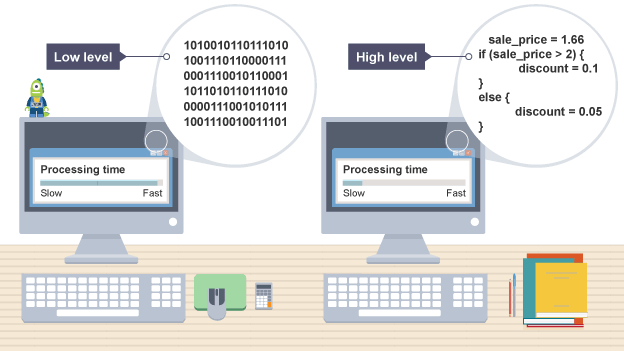

In short a program written in a low-level language can be made to run very quickly, with a small memory footprint. An equivalent program in a high-level language can be less efficient and use more memory.

### Adding Two Numbers: Higher-level language vs Low-level language

---

#### Example 1: Adding Two Numbers in Python (Higher-Level Language)


```python
def add_numbers(a, b):
    """Function to add two numbers."""
    return a + b

# Example usage
num1 = 5
num2 = 7
result = add_numbers(num1, num2)
print(f"The sum of {num1} and {num2} is: {result}")
```

#### Example 2: Adding Two Numbers in Assembly (Low Level Language)

```
section .data
    num1 db 5         ; First number
    num2 db 7         ; Second number
    result db 0       ; Variable to store the result

section .text
    global _start

_start:
    ; Load the first number into AL
    mov al, [num1]    ; Move num1 into AL
    ; Add the second number to AL
    add al, [num2]    ; Add num2 to AL

    ; Store the result
    mov [result], al  ; Store the result in the result variable

    ; Exit the program (Linux syscall)
    mov eax, 1        ; syscall: exit
    xor ebx, ebx      ; status: 0
    int 0x80
```

- Data Section: The .data section defines the two numbers (num1 and num2) and a result variable initialized to 0.
- Text Section: The .text section contains the code to perform the addition.
- Loading Values: The mov instruction loads num1 into the AL register.
- Addition: The add instruction adds the value in num2 to the value in AL.
- Storing the Result: The result is then stored back into the result variable.
- System Call for Exit: The program ends with a system call to exit.



### Why C?
C is a powerful, low-level programming language that excels in system programming, offering fine-grained control over hardware and memory. It's widely used in developing operating systems, embedded systems, and performance-critical applications.

What makes C unique is that it is optimized for low-level memory management tasks that were previously written in Assembly language (the code follows the hexadecimal format that can directly access memory locations).




### Benefits of Using Cython
Cython gives you the combined power of Python and C to let you

- write Python code that calls back and forth from and to C or C++ code natively at any point.
- easily tune readable Python code into plain C performance by adding static type declarations, also in Python syntax.
- use combined source code level debugging to find bugs in your Python, Cython and C code.
- interact efficiently with large data sets, e.g. using multi-dimensional NumPy arrays.
- quickly build your applications within the large, mature and widely used CPython ecosystem.
- integrate natively with existing code and data from legacy, low-level or high-performance libraries and applications.

## **Compiling Python Code to C**

---


### Cython Function Types

In cython, we can declare three types of functions:

* cdef: C level function. cdef functions cannot be called directly in pure python.
* cpdef: C level function with a python binding so it can be called in pure python.
* def: Pure python function.
Within cython, variables must also be declared with the cdef declaration. i.e.



```python
cdef int i            # declare an integer variable
cdef double d = 10.1  # declare a double and initialize it to 10.1
```



### Cython Data Types


Unlike python, where variables are infered by the python interpreter, cython variables must be declared. The next cell demonstrates some of the data types available in cython.


```python
# - declaration of basic C variable types
cdef:
  int i = 0       # integer
  bint b = True   # boolean
  char c = b'w'   # character
  double d = 10.1 # double
  float f = 1.10  # floating point
  long l = 1000   # long int
  long double ld = 100000000000.10 # long double
```




### Cython Pointers

Pointers are variables that store memory addresses of other variables. Using pointers in Cython can lead to faster code execution, especially when dealing with large data structures or performing low-level memory manipulation.

To declare a pointer in Cython, you use the * operator in the variable type declaration. For example:


```python
cdef int* ptr  # Declares a pointer to an integer

```



## **Steps to compile a Python Code to C**

---



### Compiling Python code to C on your machine



1.   ***Step 1: Start with a .py file or .pyc***

You begin with a regular Python file (.py). This file contains your Python code, but you can optionally tweak it to use Cython's special features to improve performance by adding type declarations or calling C functions.

2.  ***Step 2: Use Cython Compiler***

The Cython compiler takes your Python file and converts it into C code. Cython translates your Python code into C to make it faster. This C code uses Python's C API so it can still run inside the Python environment.

3. ***Step 3: Compile C Code to Bytecode***

The C code is then compiled by a C compiler (like GCC or MSVC). This compilation turns it into a binary file (like a .pyd file on Windows). This binary is just like Python’s .pyc files but faster, because it’s backed by C.

4. ***Step 4: CPython Interpreter Loads the Compiled File***

CPython Interpreter Loads the Compiled File
The CPython interpreter (the regular Python interpreter you use) can now import this compiled module just like any regular Python module. Even though it’s compiled C code, Python can still work with it seamlessly.

5. ***Step 5: Python Virtual Machine Executes***

The Python virtual machine (VM) then runs the compiled code. It’s still Python from your point of view, but behind the scenes, it’s executing faster C functions, which gives better performance.

6. ***Step 6: .pyd in windows***

On Windows, the compiled output is a .pyd file (similar to a .so file on Linux). This is like a special library that Python imports and runs just like any other Python module, but it runs much faster because it’s written in C.

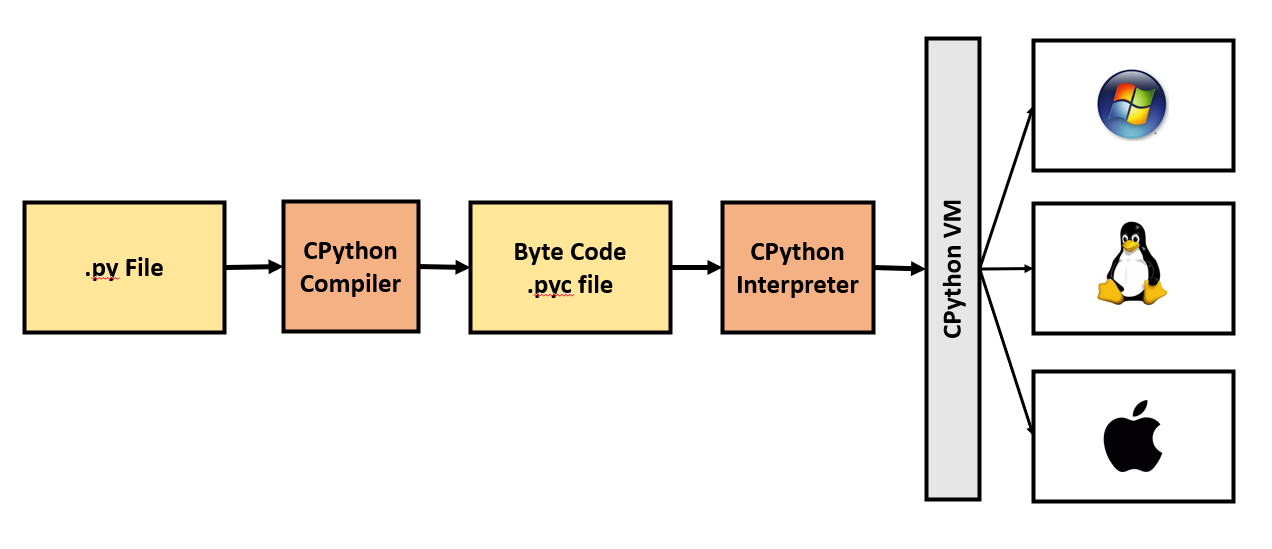

### Example
Let's try running a program that sums all integers from 1 to 100 million, excluding those divisible by 5.

#### Python

```python
import time

def somefunc(K):
    accum = 0
    for i in range(K):
        if i % 5:
            accum = accum + i
    return accum

t1 = time.time()
somefunc(100_000_000)
t2 = time.time()
print(f"Time taken: {t2-t1} seconds")

# Output
19.86483883857727 seconds

```

The Python code measures the time it takes to sum integers from 0 to 99,999,999 that are not divisible by 5

*   Imports: It imports the time module to track execution time.

*   Function Definition: somefunc(K) takes a parameter K and initializes accum to 0. It loops through numbers from 0 to K-1. If a number i is not divisible by 5 (if i % 5:), it adds i to accum. The function returns the total sum.
* Execution : It records the start time with t1 = time.time().
It calls somefunc(100_000_000) to perform the sum.
It records the end time with t2 = time.time().
Output: Finally, it prints the time taken for the calculation.


#### Cython


```python
cimport cython # specific functions and declarations, allowing you to use Cython features and optimizations in your code.

@cython.cdivision(True)
@cython.boundscheck(False)
@cython.wraparound(False)
@cython.nonecheck(False)
cpdef unsigned long long int somefunc_cy3(long int K):    
    cdef unsigned long long int accum = 0
    cdef long int i    
    for i in range(K):
        if i % 5:
            accum = accum + i
    return accum

from example_cy_decor import somefunc_cy3

t1 = time.time()
somefunc_cy3(100_000_000)
t2 = time.time()
print(f"Time taken: {t2-t1} seconds")

# Output
0.3634757995605469 seconds
```
##### Cython Decorators
**@cython.cdivision(True)**: This decorator allows C-style division, meaning that integer division will be performed without Python’s default behavior of raising exceptions for division by zero. This improves performance when performing division operations.

**@cython.boundscheck(False)**: This disables bounds checking for array accesses, which can speed up operations at the cost of safety. It assumes that you will not access out-of-bounds indices.

**@cython.wraparound(False)**: By default, negative indices are allowed in Python, and Cython will handle them with wraparound logic. This decorator disables that behavior, optimizing the index handling for performance.

**@cython.nonecheck(False)**: This disables checking for None when dereferencing pointers, further improving performance when you are sure that your pointers will not be None.
